# Training Models


Linear Regression model
    Using a direct “closed-form” equation
    Using an iterative optimization approach called Gradient Descent (GD)
    
Polynomial Regression
    a more complex model that can fit non‐ linear datasets
    
Two more models that are commonly used for classification tasks
    Logistic Regression and Softmax Regressi
    

# Linear Regression

$\hat{y} = h_θ(x) = θ · x = θ_0x_0 + θ_1x_1 + θ_2x_2 + ... + θ_nx_n.$

how do we train it?
    we need to find the value of θ that minimizes the RMSE
To find the value of θ that minimizes the cost function  
Normal Equation  
    $θ=X^⊺X^{−1} X^⊺ y$  
<br>  
$θ^⊺$ is the transpose of θ (a row vector instead of a column vector)  
$MSE(X,h_θ) =m∑(θ^⊺x^{(i)}−y^{(i)})^2$

In [9]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression using the Normal Equation  
***  
To find the value of θ that minimizes the cost function  
 - Normal Equation  
 $\hat{θ}=X^⊺X^{−1} X^⊺ y$ 

In [1]:
import numpy as np

# 0부터 1사이의 균일 분포 100개
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [28]:
print(X)

[[0.71194536]
 [1.51569222]
 [0.02878698]
 [0.23214528]
 [0.09200528]
 [0.0814576 ]
 [1.71092117]
 [1.40731572]
 [0.94834766]
 [0.19566832]
 [0.98323175]
 [0.94694354]
 [0.34640374]
 [0.8677033 ]
 [0.79700947]
 [1.2317002 ]
 [1.2701873 ]
 [0.09060802]
 [0.74922523]
 [1.25171983]
 [1.00627252]
 [1.71297968]
 [1.31738726]
 [0.32586885]
 [0.14113749]
 [1.28483856]
 [0.05302262]
 [1.17155116]
 [1.88046048]
 [1.15094836]
 [0.77633985]
 [1.28657644]
 [0.91650578]
 [1.09123358]
 [1.88292962]
 [0.77220528]
 [1.92238113]
 [1.81070128]
 [0.39158227]
 [0.1387226 ]
 [0.201556  ]
 [0.03644365]
 [0.18888592]
 [1.36601355]
 [0.1423773 ]
 [0.63795126]
 [1.68975062]
 [0.04654387]
 [1.62893697]
 [0.56370955]
 [0.23632966]
 [1.39347433]
 [1.25788569]
 [1.75494403]
 [1.47014209]
 [1.60696186]
 [0.56406915]
 [0.35487909]
 [1.5012295 ]
 [1.61366948]
 [1.98101028]
 [0.82523535]
 [0.74403617]
 [1.55282592]
 [0.68160708]
 [1.86151465]
 [1.7168255 ]
 [0.85798805]
 [1.50174214]
 [1.50908575]
 [0.20624774]
 [1.80

Saving figure generated_data_plot


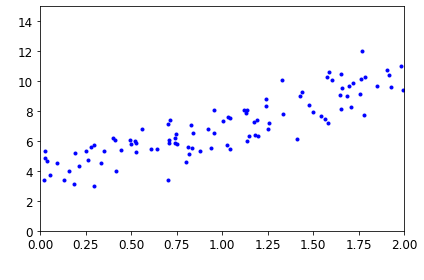

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18, color='white')
plt.ylabel("$y$", rotation=0, fontsize=18, color='white')
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

#### np.linalg.inv()  
 - compute the inverse of a matrix  

#### dot()  
 - for matrix multiplication  
 
 $\hat{θ}=X^⊺X^{−1} X^⊺ y$ 


In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance, -> [1.        , 1.32993238]
# compute θ using the Normal Equation inv()
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# np.linalg to compute the inverse of a matrix

In [6]:
X_b

array([[1.        , 1.32993238],
       [1.        , 0.49256351],
       [1.        , 1.75688665],
       [1.        , 1.42443108],
       [1.        , 1.04002533],
       [1.        , 0.0262375 ],
       [1.        , 1.58582261],
       [1.        , 0.70398691],
       [1.        , 1.23961489],
       [1.        , 1.1775736 ],
       [1.        , 1.98032071],
       [1.        , 1.49951165],
       [1.        , 0.21362148],
       [1.        , 0.82853652],
       [1.        , 0.02781471],
       [1.        , 1.65205193],
       [1.        , 1.54465326],
       [1.        , 0.74672703],
       [1.        , 1.1485161 ],
       [1.        , 0.26489439],
       [1.        , 1.04197838],
       [1.        , 1.41114343],
       [1.        , 1.19513096],
       [1.        , 0.29764191],
       [1.        , 0.13338123],
       [1.        , 1.13522806],
       [1.        , 0.41535529],
       [1.        , 1.85012339],
       [1.        , 0.71141064],
       [1.        , 0.84164424],
       [1.

In [25]:
theta_best
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770

array([[4.21509616],
       [2.77011339]])

In [29]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
# .dot() for matrix multiplication
y_predict

array([[4.21509616],
       [9.75532293]])

In [8]:
np.ones((2, 1))

array([[1.],
       [1.]])

In [46]:
X_new_b

array([[1., 0.],
       [1., 2.]])

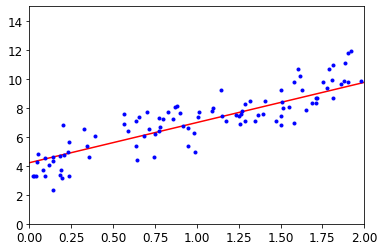

In [34]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


Saving figure linear_model_predictions_plot


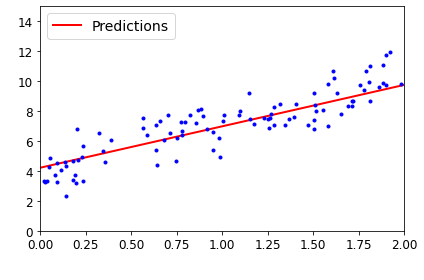

In [43]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18, color='white')
plt.ylabel("$y$", rotation=0, fontsize=18, color='white')
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

# Singular Value Decomposition (SVD) 
***    
pseudoinverse itself is computed using a standard matrix factorization technique  
X into the matrix multiplication of three matrices $U\ Σ\ V^⊺$   
#### numpy.linalg.svd()  
pseudoinverse is computed as $X^+ = VΣ^+ U^⊺$ 


In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93829632]), array([[3.1429825]]))

In [48]:
lin_reg.predict(X_new)

array([[ 3.93829632],
       [10.22426133]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
# This function computes θ = X+ y, X+ is the pseudoinverse of X
theta_best_svd


This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.79210266],
       [3.19292033]])

The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD)

pseudoinverse is computed as X = VΣ U 


In [13]:
import numpy as np
import pandas as pd

df =pd.read_csv('/Users/j/Downloads/sample.csv')
print(df)



                                      colA
0  [['k', 2], ['p', 3], ['', 4], ['', 10]]
1      [['',3], ['', 8], ['s', 8], ['',2]]
